
# A machine Learning approach to House price prediction.

## Objective:
The objective of this project is to develop a model using linear regression to predict the House prices.

In [5]:
# Loading necessary libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,FunctionTransformer
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

## Dataset
The House price dataset that is publicaly available from Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) 
is used for the study. 


In [7]:
# Importing train and test data
train=pd.read_csv('train_house.csv')
test=pd.read_csv('test_house.csv')

In [8]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset contain 80 features (eg: Lot area, GarageAres) to analyze for the prediction of House prices

In [11]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
# Basic statistical description
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Preprocessing 
The preprocessing of dataset is a crucial step in every machine learning project to ensure cleaned and well-structured data is fed to the model. 
The dataset contain missing values, duplicates and outliers which can impact model performance. The preprocessing taksks involves handling these 
inconsitencies to improve data quality and reliability.


In [16]:
# Checking missing values
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

## Handling Missing values
The .isnull() method is used to calculate the total number of NaN (Not a Number) values in each column. However, in this dataset, certain categorical 
values such as "NA" represent meaningful information rather than actual missing values.
For example:
In the Alley column, "NA" means no alley access, not a missing value.
In the BsmtFinType2 column, "NA" indicates no basement, rather than missing data.

If we treat these "NA" values as missing data and impute or remove them, we may alter the meaning of the dataset and negatively impact model performance. 
Instead, these values should be retained as valid categories.
Here both train and test dataset were seperated based on numerical and categorical columns for handling inconistencies.

In [19]:
# seperating the numerical and categorical features of train and test data 
num_col_train=train.select_dtypes(include='number')
cat_col_train=train.select_dtypes(include='object')

In [20]:
num_col_test=test.select_dtypes(include='number')
cat_col_test=test.select_dtypes(include='object')

In [21]:
num_col_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [22]:
cat_col_train.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [23]:
# The missing values in the numerical columns should be replaced with the median value
def num_col_null(data,column):
    for col in column:
        data[col]=data[col].fillna(data[col].median())
    return data

In [24]:
column=num_col_train.columns

In [25]:
num_train_clear=num_col_null(num_col_train,column)


In [26]:
cols=num_col_test.columns

In [27]:
num_test_clear=num_col_null(num_col_test,cols)

In [28]:
# To check whether the data is cleaned
num_train_clear.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [29]:
num_test_clear.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

###  Dealing the null values in categorical columns
The Nan value in the categorical columns cannot be removed or imputed by the statistcal mesures such as median or mode value, 
they have been replaced with the label "Nil" to retain meaningful data.

In [31]:
def cat_col_null(data,columns):
    for col in columns:
        data[col]=data[col].fillna('Nil')
    return data

In [32]:
columns=cat_col_train.columns

In [33]:
cat_train_clear=cat_col_null(cat_col_train,columns)
cat_test_clear=cat_col_null(cat_col_test,columns)

In [34]:
cat_train_clear

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Nil,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
1,RL,Pave,Nil,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
2,RL,Pave,Nil,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
3,RL,Pave,Nil,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Nil,Nil,Nil,WD,Abnorml
4,RL,Pave,Nil,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Nil,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
1456,RL,Pave,Nil,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Nil,MnPrv,Nil,WD,Normal
1457,RL,Pave,Nil,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Nil,GdPrv,Shed,WD,Normal
1458,RL,Pave,Nil,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Nil,Nil,Nil,WD,Normal


In [35]:
cat_train_clear.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [36]:
cat_test_clear.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

### Outlier detection
Outliers are extreme values in the dataset that can negatively impact the performance of a machine learning model. Detecting and handling outliers is crucial to ensure the model learns from meaningful data and not from extreme, rare cases.

<Axes: xlabel='SalePrice', ylabel='Density'>

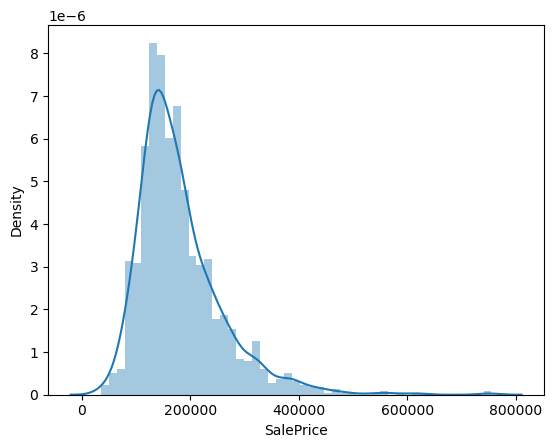

In [38]:
sns.distplot(num_train_clear['SalePrice'])

<Axes: ylabel='SalePrice'>

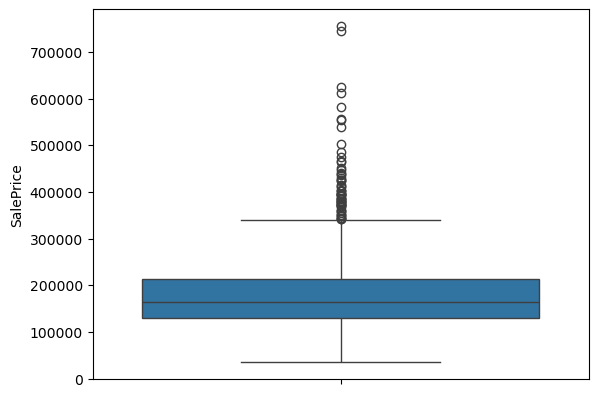

In [39]:
# Checking outliers for target column

sns.boxplot(num_train_clear['SalePrice'])

In [40]:
correlation_matrix=num_train_clear.corr()

In [41]:
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<Axes: >

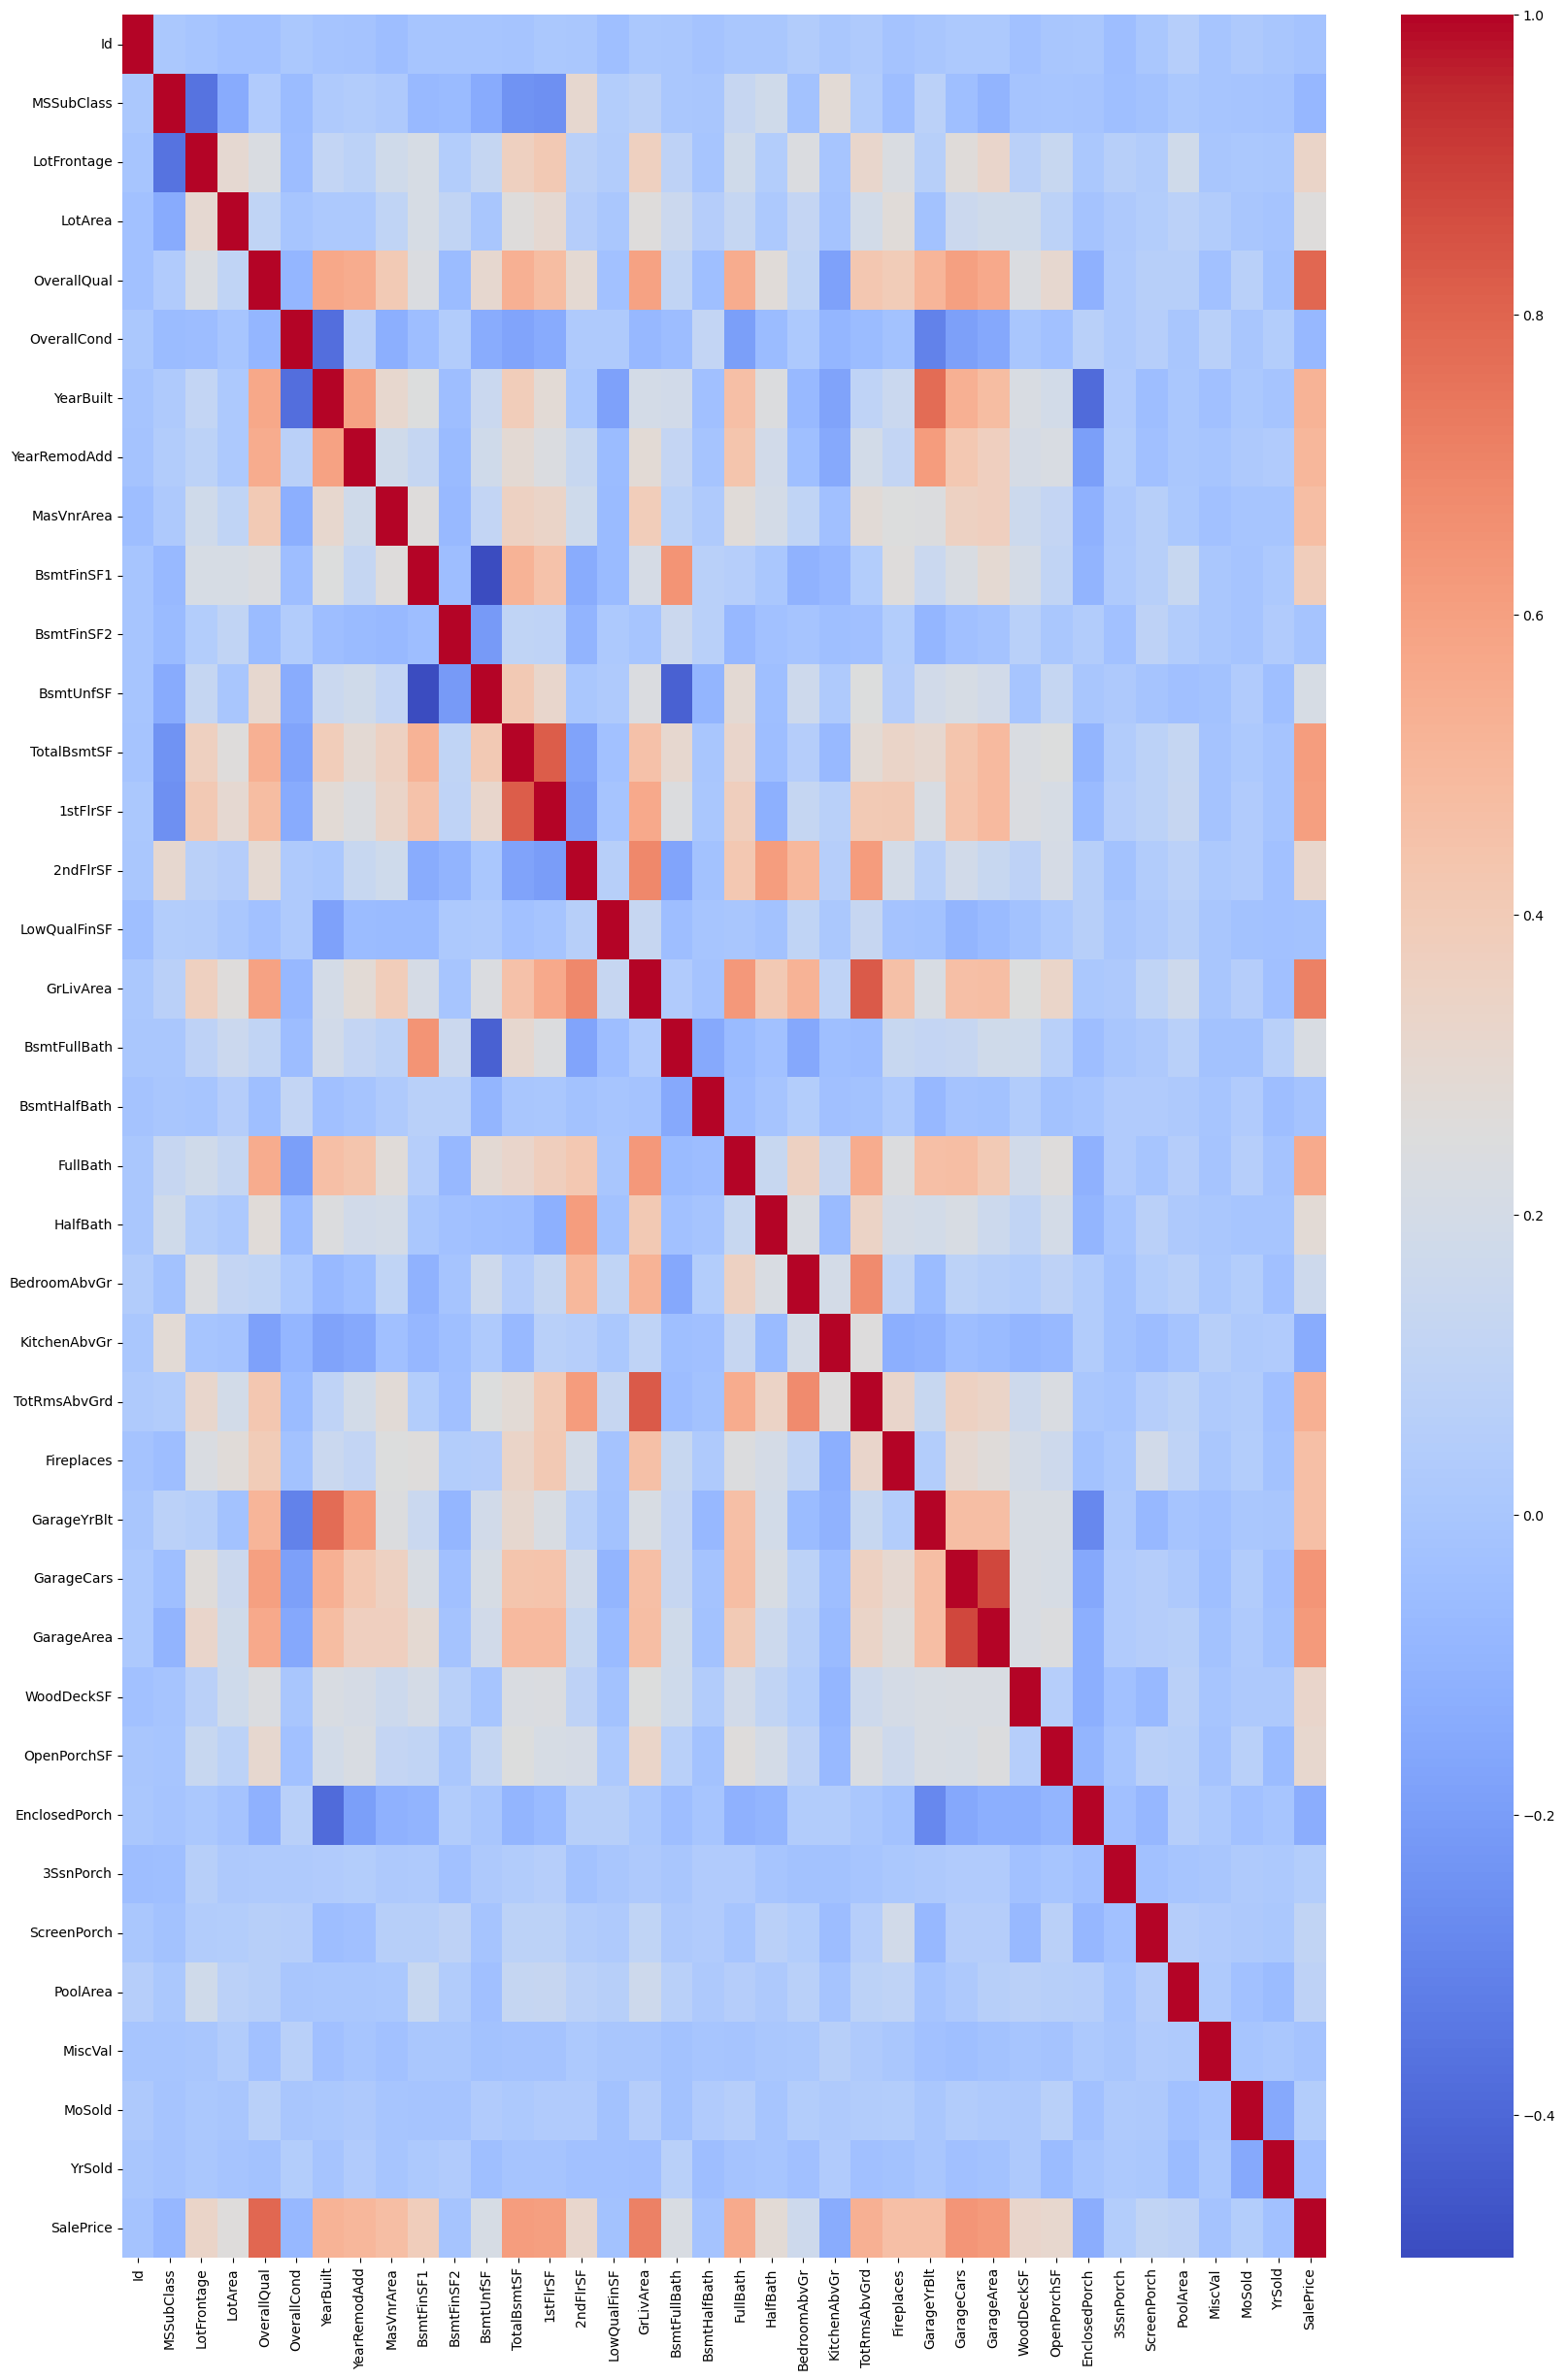

In [42]:
plt.figure(figsize=(20,30))
sns.heatmap(correlation_matrix,cmap='coolwarm')

The features highly correlated with SalePrice include OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, and GarageArea. Since these features have a strong influence on house prices, identifying and handling outliers in them is crucial. Outliers in these columns may arise due to data entry errors or extreme cases, such as luxury properties with unusually high values. To detect these outliers, boxplots and scatterplots can be used for visual inspection, while statistical methods like IQR method help quantify extreme values

In [44]:
# Handling outliers using IQR method
def outliers(data,col):
    data=data.copy()
    outlier_count={}
    for cols in col:
        Q1=data[cols].quantile(0.25)
        Q3=data[cols].quantile(0.75)
        IQR=Q3-Q1
        lb=Q1-1.5*IQR
        ub=Q3+1.5*IQR
        out=data[cols].apply(lambda x: (x<lb )| (x>ub))
        count=out.sum()
        data[cols]=data[cols].apply(lambda x: lb if x<lb else ub if x>ub else x)
        outlier_count[cols]=count
    return outlier_count,data

In [45]:
col=num_train_clear.columns

In [46]:
count,num_out=outliers(num_train_clear,col)

In [47]:
num_out

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2,2008,208500.0
1,2,20.0,80.0,9600.0,6.0,7.5,1976.0,1976,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2007,181500.0
2,3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9,2008,223500.0
3,4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970,0.0,216.0,...,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2,2006,140000.0
4,5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,62.0,7917.0,6.0,5.0,1999.0,2000,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8,2007,175000.0
1456,1457,20.0,85.0,13175.0,6.0,6.0,1978.0,1988,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2010,210000.0
1457,1458,70.0,66.0,9042.0,7.0,7.5,1941.0,2006,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,0.0,5,2010,266500.0
1458,1459,20.0,68.0,9717.0,5.0,6.0,1950.0,1996,0.0,49.0,...,366.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2010,142125.0


<Axes: xlabel='SalePrice', ylabel='Density'>

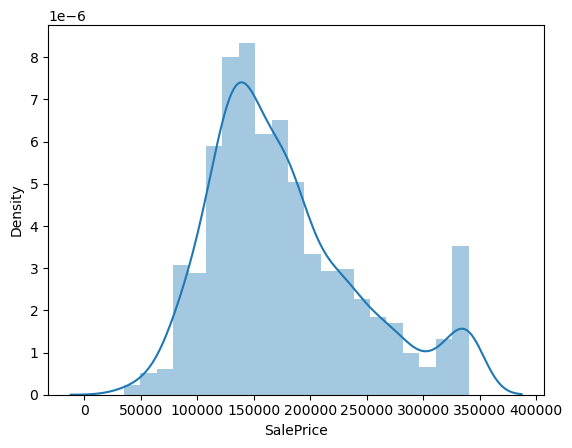

In [48]:
# Distribution of house prices afters dealing the outliers.
sns.distplot(num_out['SalePrice'])

# Exploratory data analysis

In [50]:
# Type of dwelling and house price

Text(0.5, 1.0, 'Type of dwelling')

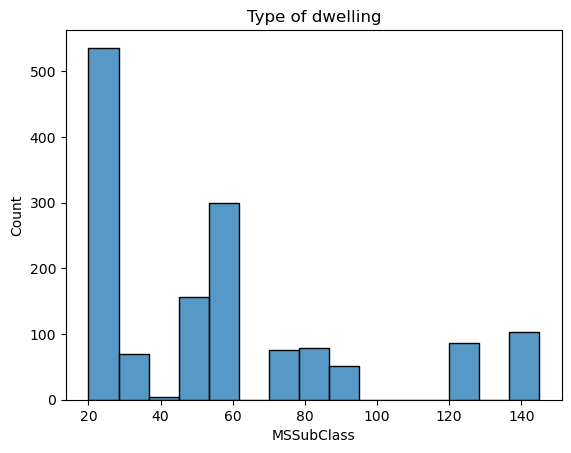

In [51]:
sns.histplot(num_out['MSSubClass'])
plt.title('Type of dwelling')

The dwelling type 20 which represents 1 story 1946 and newer all styles has higher number in the dataset indicating that people prefer this type of dwelling.

Text(0.5, 1.0, 'Sale price of various dwelling types')

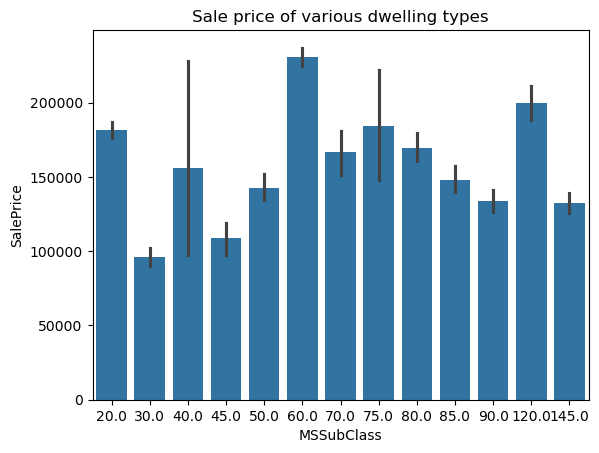

In [53]:
# Dwelling type with higher sales price
sns.barplot(data=num_out,x='MSSubClass',y='SalePrice')
plt.title('Sale price of various dwelling types')

The sale price of house with dwelling 60 (type 2-STORY 1946 & NEWER) is high.

<Axes: xlabel='SaleType', ylabel='Count'>

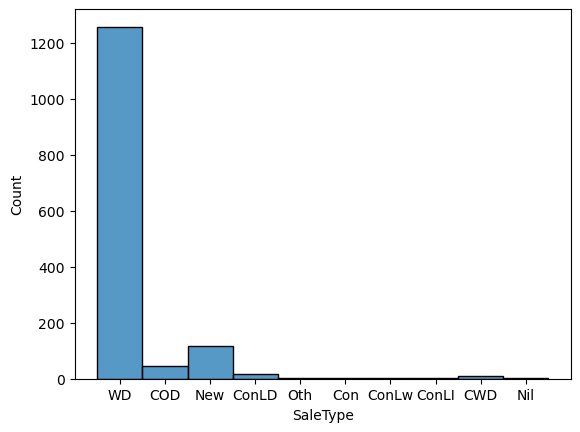

In [55]:
sns.histplot(cat_test_clear['SaleType'])

<BarContainer object of 1460 artists>

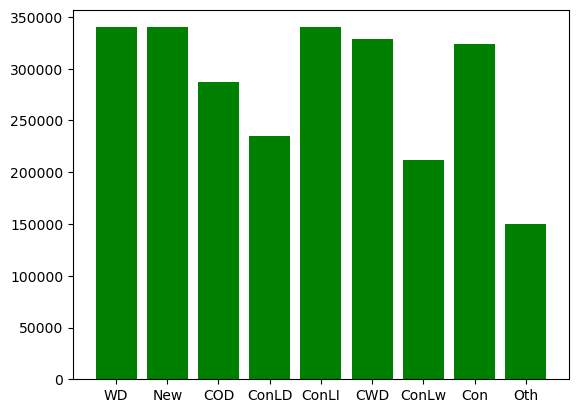

In [56]:
plt.bar(cat_train_clear['SaleType'],num_out['SalePrice'],color='green')

In [57]:
final_train=pd.concat([num_out,cat_train_clear],axis=1)

In [58]:
final_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003,196.0,706.0,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
1,2,20.0,80.0,9600.0,6.0,7.5,1976.0,1976,0.0,978.0,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
2,3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002,162.0,486.0,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
3,4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970,0.0,216.0,...,Detchd,Unf,TA,TA,Y,Nil,Nil,Nil,WD,Abnorml
4,5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000,350.0,655.0,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,62.0,7917.0,6.0,5.0,1999.0,2000,0.0,0.0,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
1456,1457,20.0,85.0,13175.0,6.0,6.0,1978.0,1988,119.0,790.0,...,Attchd,Unf,TA,TA,Y,Nil,MnPrv,Nil,WD,Normal
1457,1458,70.0,66.0,9042.0,7.0,7.5,1941.0,2006,0.0,275.0,...,Attchd,RFn,TA,TA,Y,Nil,GdPrv,Shed,WD,Normal
1458,1459,20.0,68.0,9717.0,5.0,6.0,1950.0,1996,0.0,49.0,...,Attchd,Unf,TA,TA,Y,Nil,Nil,Nil,WD,Normal


In [59]:
final_test= pd.concat([num_test_clear,cat_test_clear],axis=1)

In [60]:
final_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,Attchd,Unf,TA,TA,Y,Nil,MnPrv,Nil,WD,Normal
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,Attchd,Unf,TA,TA,Y,Nil,Nil,Gar2,WD,Normal
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,Attchd,Fin,TA,TA,Y,Nil,MnPrv,Nil,WD,Normal
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,Attchd,Fin,TA,TA,Y,Nil,Nil,Nil,WD,Normal
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,Attchd,RFn,TA,TA,Y,Nil,Nil,Nil,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,Nil,Nil,Nil,Nil,Y,Nil,Nil,Nil,WD,Normal
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,CarPort,Unf,TA,TA,Y,Nil,Nil,Nil,WD,Abnorml
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,Detchd,Unf,TA,TA,Y,Nil,Nil,Nil,WD,Abnorml
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,Nil,Nil,Nil,Nil,Y,Nil,MnPrv,Shed,WD,Normal


In [61]:
y=final_train['SalePrice'] # the target variable

In [62]:
final_train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [63]:
#determining the data type and unique values in categorical columns

def unique_values(data,columns):
    unique={}
    for col in columns:
        unique[col]=final_train[col].unique()
    return unique
    
    

In [64]:
unique_values(final_train,columns)

{'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'Alley': array(['Nil', 'Grvl', 'Pave'], dtype=object),
 'LotShape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 'LandContour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object),
 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object),
 'LotConfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Neighborhood': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
        'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
        'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
        'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
        'Blueste'], dtype=object),
 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'], dtype=object),
 'Condition2': array(['Norm', 'Arter

## Encoding categorical variable

In [66]:
le=LabelEncoder()
categorical_cols=final_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    final_train[col+"encoded"]=le.fit_transform(final_train[col])
    

In [67]:
final_train=final_train.drop(columns=categorical_cols,axis=1)

# Feature selection

In [69]:
X=final_train.drop(columns=['SalePrice'],axis=1)

In [70]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageTypeencoded,GarageFinishencoded,GarageQualencoded,GarageCondencoded,PavedDriveencoded,PoolQCencoded,Fenceencoded,MiscFeatureencoded,SaleTypeencoded,SaleConditionencoded
0,1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003,196.0,706.0,...,1,2,5,5,2,3,4,1,8,4
1,2,20.0,80.0,9600.0,6.0,7.5,1976.0,1976,0.0,978.0,...,1,2,5,5,2,3,4,1,8,4
2,3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002,162.0,486.0,...,1,2,5,5,2,3,4,1,8,4
3,4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970,0.0,216.0,...,5,3,5,5,2,3,4,1,8,0
4,5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000,350.0,655.0,...,1,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,62.0,7917.0,6.0,5.0,1999.0,2000,0.0,0.0,...,1,2,5,5,2,3,4,1,8,4
1456,1457,20.0,85.0,13175.0,6.0,6.0,1978.0,1988,119.0,790.0,...,1,3,5,5,2,3,2,1,8,4
1457,1458,70.0,66.0,9042.0,7.0,7.5,1941.0,2006,0.0,275.0,...,1,2,5,5,2,3,0,3,8,4
1458,1459,20.0,68.0,9717.0,5.0,6.0,1950.0,1996,0.0,49.0,...,1,3,5,5,2,3,4,1,8,4


In [71]:
X.shape

(1460, 80)

In [72]:
# Feature selection
sk=SelectKBest(score_func=f_regression,k=12)
x_kbest=sk.fit_transform(X,y)

# Get selected feature names
selected_features = X.columns[sk.get_support()]
print("Top Features Selected:")
print(selected_features)

Top Features Selected:
Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'ExterQualencoded',
       'BsmtQualencoded', 'KitchenQualencoded'],
      dtype='object')


In [73]:
# Splitting the data into training and testing

print("\nSplitting data...")
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


Splitting data...


## Feature scaling

In [75]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Building the ML Model
## Linear regression model

In [77]:
model=LinearRegression()

Since house prices tend to be right-skewed, applying a log transformation to the target variable (SalePrice) helps normalize the distribution. This transformation reduces the effect of extreme values and improves the model's ability to learn patterns effectively.

In [79]:
y_train_log=np.log1p(y_train)
y_test_log=np.log1p(y_test)

<Axes: xlabel='SalePrice', ylabel='Density'>

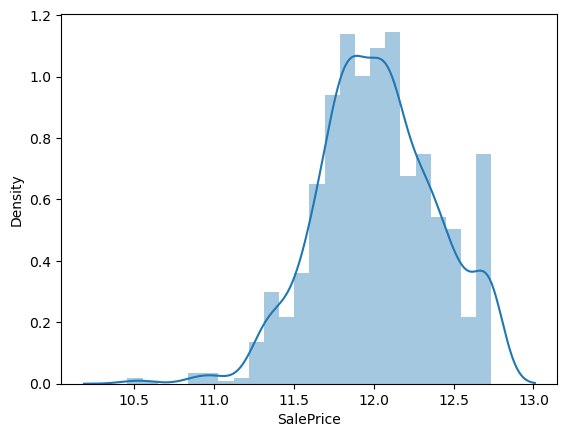

In [80]:
sns.distplot(y_train_log)

In [81]:
model.fit(X_train_scaled,y_train_log)


LinearRegression()

## Prediction

In [83]:
y_pred=model.predict(X_test_scaled)

Evaluating the Model performance using the metrices Mean absolute error, Mean squared error, root mean squared error and R2 score

In [85]:
MAE=mean_absolute_error(y_test_log, y_pred)
MSE= mean_squared_error(y_test_log, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test_log, y_pred))
R2=r2_score(y_test_log, y_pred)
print('MAE',MAE)
print('MSE',MSE)
print('RMSE',RMSE)
print('R2',R2)

MAE 0.110468898164676
MSE 0.025914179508594863
RMSE 0.16097881695612892
R2 0.8425124930391604


R² directly shows how much of the target variable’s variation is captured by the model. Here R2 score is 84% .
Higher R² means a better model fit, meaning more of the dependent variable’s behavior is accounted for by the predictors.

In [87]:
y_pred=np.expm1(y_pred)

In [88]:
y_pred[:5]

array([143178.79051416, 311326.64325621, 112578.49431174, 147018.46912934,
       298210.5636434 ])

## creating pipeline 

In [90]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])
          

In [91]:
# defining log transformation for target variable

In [92]:
#pipeline with log transformation for y
pipeline_with_log_y = TransformedTargetRegressor(regressor=pipeline, func=np.log1p,inverse_func=np.expm1)


In [93]:
param_grid = {
    'regressor__model': [Lasso(alpha=a) for a in np.logspace(-4, 1, 10)]}

# Hyperparameter tuning using GridsearchCV with Lasso regularization
Lasso (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that adds L1 regularization, which helps in feature selection by shrinking some coefficients to zero, effectively removing less important features.

Hyperparameter tuning helps in optimizing the performance of the model by selecting the best combination of hyperparameters. For Lasso, the most important hyperparameter is alpha (α), which controls the strength of regularization:

Higher α → More shrinkage (simpler model, more coefficients set to zero)
Lower α → Less shrinkage (model behaves closer to standard linear regression)


In [95]:
grid_search = GridSearchCV(
    estimator=pipeline_with_log_y,
    param_grid=param_grid,
    cv=5, scoring='r2'
)

# Step 4: Train the model
grid_search.fit(X_train, y_train)

# Best parameters and score
#print("Best number of features:", grid_search.best_params_['regressor__feature_selection__k'])
print("Best Lasso alpha:", grid_search.best_params_['regressor__model'].alpha)
print("Best R² score:", grid_search.best_score_)
# Step 5: Save the trained pipeline
#joblib.dump(grid_search, 'lasso_log_selectkbest_pipeline.pkl')
#print("Pipeline saved successfully!")

Best Lasso alpha: 0.016681005372000592
Best R² score: 0.8281856130952117


In [96]:
y_new_pred=grid_search.predict(X_test)

In [97]:
r2_new=r2_score(y_test,y_new_pred)

In [98]:
r2_new

0.8714071964852759

The R2 score improved indicating that the hyperparameter tuning increases the model performance

In [100]:
X_train_columns=list(X_train.columns)

In [105]:
#Save the trained pipeline
joblib.dump((grid_search,X_train_columns), 'House_Price_prediction.joblib')
print("Pipeline saved successfully!")

Pipeline saved successfully!


In [107]:
# Load the saved model
loaded_model,features = joblib.load('House_Price_prediction.joblib')

y_pred = loaded_model.predict(X_test)

print("Predictions:", y_pred[:5])

Predictions: [142558.60390231 292686.63509756 117480.34667896 153700.73546698
 281588.18612007]
